## Week03 - Non-parametric tests, correlation and regression ###

### Parametric vs. non-parametric statistical tests

#### Parametric test
- Based on parameters that summarize a distribution, such as mean and standard deviation
- For example, t-tests and ANOVA assume a normal distribution of samples

#### Non-parametric test
- Advantage: No assumptions about parent population (more robust)
- Disadvantage: Less power in situations where parametric assumptions are satisfied (more samples needed to draw conclusions at same confidence level)

### Testing for normality

The following figures come from a notebook on the central limit theorem and testing for normality of a distribution:

https://github.com/tompc35/oceanography-notebooks/blob/master/central_limit_theorem.ipynb

<img src='images/norm_dist_week3.png' width="500">

Blue: Sample distribution ($O_i$)<br>
Red: Normal distribution with same mean and standard deviation, expected value ($E_i$)

#### Chi squared test for normality

### $$ X^2 = \sum_{i=1}^k \frac{\left(O_i - E_i\right)^2}{E_i}$$ ###

Compare this test statistic to the Chi-Squared distribution $\chi_{\nu, 1-\alpha}^2$, where $\nu = k-1$ is the degrees of freedom.

- If test statistic is larger than the Chi-square value, can reject the Null Hypothesis that they are from the same distribution. Note that this test is sensitive to bin size.

__ Probability Plot __

<img src='images/prob_dens.png' width="500">

The corresponding probability plot for this distribution is shown below:

<img src='images/prob_plot.png' width="500">

The x-axis is the _quantiles_ of the normal. If a normal distribution is split up into some discrete number of pieces, the quantiles are the z-scores at the edges of each piece. The quantiles are tightly clustered near zero.

The y-axis is the _ordered values_ in the sample distribution.

If values are normally distributed, the quantiles should plot linearly with the ordered values. That is, most values are clustered around the mean. Note that this test is qualitative and the $R^2$ statistic does not have much meaning in this case. As we will see later, correlation statistics are only meaningful of the variables are normally distributed.

###### Example for a non-normal distribution:

<img src='images/non_norm_dist.png' width="500">
<img src='images/non_norm_prob_plot.png' width="500">



__ Kolmogorov-Smirnov test __

Can be used to compare two sample distributions, or a sample distribution and a reference distribution (normal, exponential, etc.)

Null Hypothesis: Samples are drawn from the same distribution (in the two-sample case)

##### An oceanographic example

<img src='images/km_dist.png' width="500">

_Source_: Durkin et al (2009), Chitin in diatoms and its association with the cell wall, Eukaryotic Cell

The following graph illustrates the K-S test statistic for a two-sample test.

<img src='images/ks_Wiki.png' width="400">
Source: https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test <br>

Illustration of the two-sample Kolmogorov–Smirnov statistic. Red and blue lines each correspond to an empirical distribution function, and the black arrow is the two-sample KS statistic.

### Other tests for normality

__Shapiro-Wilk__
- High Power
- Biased at __Large__ sample size

__Anderson-Darling__

These tests, along with the K-S test and probability plots are included in the Python stats library.

```python
from scipy import stats
help(stats)
```

### Non-parametric tests: univariate data

#### Wilcoxan signed-rank test

__$H_0$__: the median difference between pairs of observations is zero

- Rank the absolute values of the differences (smallest = 1)
- Sum the ranks of the positive values, and sum the ranks the negative values separately
- The smaller of the two sums is the test statistic T
- Low values of T required for significance
- Use __Mann-Whitney__ test for unpaired data

__ Kruskal-Wallis ANOVA __

__$H_0$__: Means of ranks of groups are the same <br>
__$H_0 (II)$__: Medians of groups are the same (assuming they come from distributions with the same shape)

- Related to the Mann-Whitney rank-sum test (two groups)
- Does not assume normality, but...
- According to [McDonald](http://www.biostathandbook.com), the Fisher's classic ANOVA is not actually very sensitive to non-normal distributions
- Like Fisher's classic ANOVA, testing $H_0 (II)$ does not assume difference groups have same variance( homoscedasticity)
- Welch's ANOVA is another alternative to Fisher's ANOVA that does not assume homoscedasticity (like Welch's t-test)

### Correlation

#### Correlation $\neq$ Causation ####

<img src='images/everest.png' width="500">


The __variance__ $s_x^2$ has to be positive.

### $$ s_x^2 = \frac{1}{N-1}\sum_{i=1}^N (X_i - \bar{x})(x_i - \bar{x}) $$ ###

The __covariance__ $s_{xy}^2 can be positive or negative.

### $$ s_{xy}^2 = \frac{1}{N-1}\sum_{i=1}^N (X_i - \bar{x})(y_i - \bar{y}) $$ ###

The _Pearson correlation coefficient_ is the normalized covariance between two variables.

### $$ r_{xy} = \frac{s_{xy}^2}{s_x s_y} $$ ###


__ Varying degrees of correlation __

There may be a pattern in the data, but a linear model may not be appropriate.

<img src='images/correlation_cases2.png' width="600">

[source](http://wikipedia.org/wiki/Correlation_and_dependence)

Parametric statistic (like Pearson's correlation are sensitive to outliers. For example, two radnomly generated sets of numbers might have a very low correlation coefficent, as shown below.

<IPython.core.display.Javascript object>


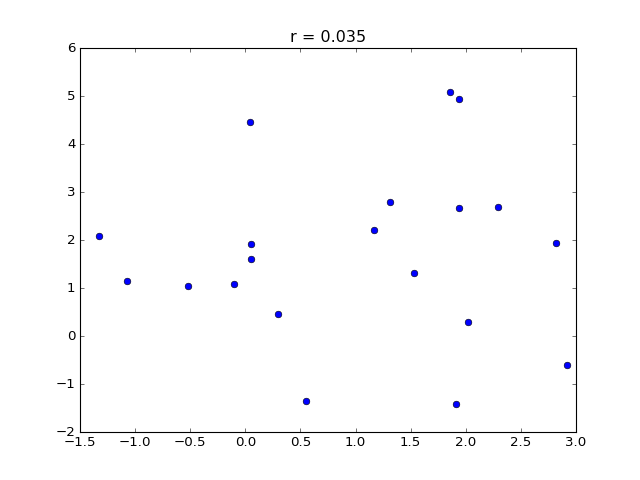

In [1]:
%matplotlib notebook
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

np.random.seed(437)
x = np.random.normal(1,1,20)
y = np.random.normal(2,2,20)

r = stats.pearsonr(x,y)

plt.figure()
plt.plot(x,y,'o')
plt.title('r = '+str(round(r[0],3)))

However, adding an outlier to this data set greatly inflates the correlation coefficient (to nearly 1).

<IPython.core.display.Javascript object>


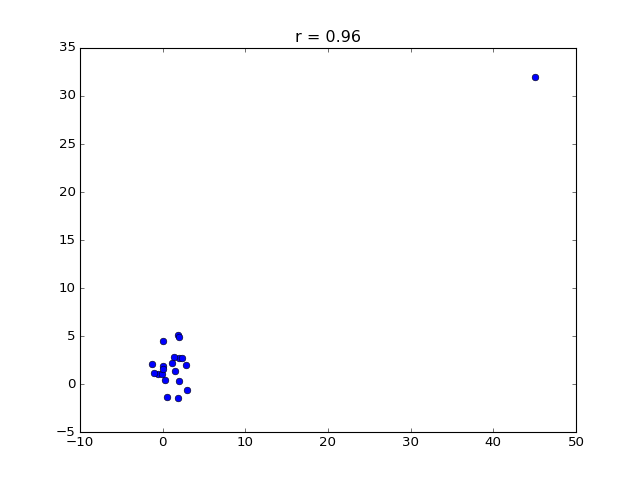

In [2]:
xo = np.append(x,45)
yo = np.append(y,32)

ro = stats.pearsonr(xo,yo)

plt.figure()
plt.plot(xo,yo,'o')
plt.title('r = '+str(round(ro[0],3)))

#### Testing significance of linear correlation

The following test statistic, will follow a t distribution for two randomly generated sets of data.

$$ t = |r|\frac{\sqrt{N-2}}{\sqrt{1-r^2}} $$ 

To test for significant at confidence level $1-\alpha$, calculate a t statistic and compare with a critical t values $t_{\nu, \alpha/2} $, where $ \nu = N-2 $ is the degrees of freedom. The degrees of freedom is $N-2$ because you can always draw a line through two data points. Three data points are needed to obatin one independent piece of information.

#### Spearman's correlation coefficient

Non-parametric test for rank-ordered correlation.

- Test for a relationship between the rank-ordered data (lowest variable in x corresponds to lowest variable in y, highest variable in x corresponds to highest variable in y, etc.)

- $\rho$ = 1 if  y increases __monotonically__ with x

<IPython.core.display.Javascript object>


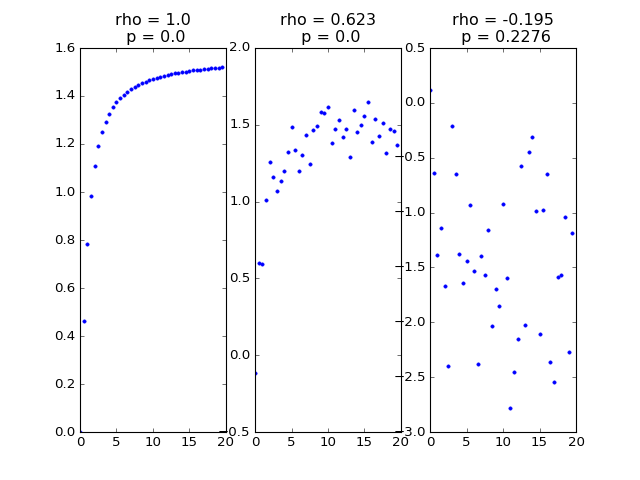

In [26]:
x = np.arange(0,20,0.5)
y1 = np.arctan(x)
y2 = np.arctan(x)+np.random.normal(0,0.1,len(x))
y3 = -np.arctan(x)+np.random.normal(0,0.6,len(x))

rho1,p1 = stats.spearmanr(x,y1)
rho2,p2 = stats.spearmanr(x,y2)
rho3,p3 = stats.spearmanr(x,y3)

plt.figure()
plt.subplot(1,3,1)
plt.plot(x,y1,'.')
plt.title('rho = '+str(round(rho1,3))+'\n p = '+str(round(p1,3)))

plt.subplot(1,3,2)
plt.plot(x,y2,'.')
plt.title('rho = '+str(round(rho2,3))+'\n p = '+str(round(p2,4)))

plt.subplot(1,3,3)
plt.plot(x,y3,'.')
plt.title('rho = '+str(round(rho3,3))+'\n p = '+str(round(p3,4)))

Spearman's correlation coefficient is not useful for relationships like those below because they are not monotonic relationships.

<img src='images/bad_rank.png' width="600">
[source: jpktd.blogspot.com](http://jpktd.blogspot.com/2012/06/non-linear-dependence-measures-distance.html)

__ Test Cases __

<img src='images/test_cases.png', width="800">


Make sure that if you are using a non-parametric test, that you know what the hypothesis is. For example, Mann-Whitney and Kruskal-Wallis test for differences between _medians_, not means. If performing a t-test on log transformed data, the null hypothesis is no difference between _geometric means_ (G.M.)

$ G.M. = \sqrt[n]{x_i \times x_2  ... x_n } $



### Linear regression (Type I) ###

__Type I regression minimizes the variance along one axis__
- x is the independent variable
- y is the dependent variable

<IPython.core.display.Javascript object>


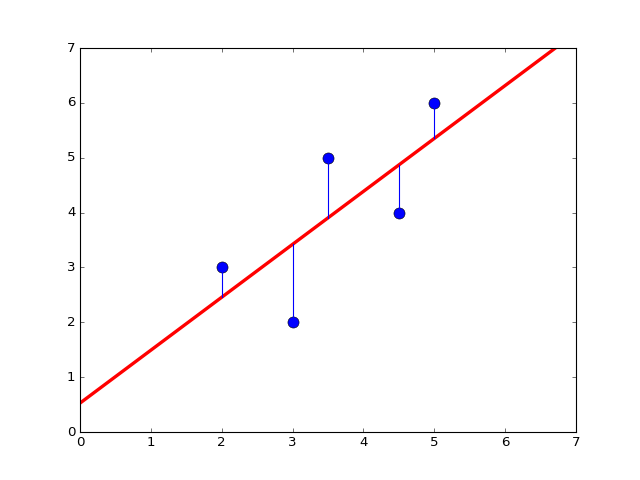

(0, 7)

In [51]:
x = np.array([2,3,3.5,4.5,5])
y = np.array([3,2,5,4,6])

slope,intercept,r,p,se = stats.linregress(x,y)

plt.figure()
plt.plot(x,y,'o',ms=10)
plt.plot(np.array([0,7]),slope*np.array([0,7])+intercept,'r-',lw=3)
for xp,yp in zip(x,y):
    plt.plot([xp,xp],[yp,slope*xp+intercept],'b')
plt.xlim([0,7])
plt.ylim([0,7])

__Type I regression assumes that the x variable is exactly known (error free) __

```python
from scipy import stats
help(stats.linregress)
```

Examples of (nearly) error free measurements:
- Time
- Chemical standard (when compared to an error-prone sensor)
- Distance

Be careful when choosing a subset!

<img src='images/temperature_trends_short_vs_long.png' width="500">
_source_: Walsh, J., et al. (11 January 2013), “Figure 6: Short-term Variations Versus Long-term Trend, in: D. Is the global temperature still increasing? Isn’t there recent evidence that it is actually 1 cooling?, in: Appendix I: NCA Climate Science - Addressing Commonly Asked Questions from A to Z”, in Federal Advisory Committee Draft Climate Assessment. A report by the National Climate Assessment Development Advisory Committee (NCADAC)[1], Washington, DC, USA: U.S. Global Change Research Program, p.1065.

__Linear Regression Assumptions__

* Validity of linear model

* Constant variance: same variance regardless of x value (homoscdastic)

* Independence of errors (errors are uncorrelated)

Anscombe's quartet shows data sets with the same mean and standard deviation in both variables, as well as the same regression line.

The code for this example comes from:
http://matplotlib.org/examples/pylab_examples/anscombe.html

<IPython.core.display.Javascript object>


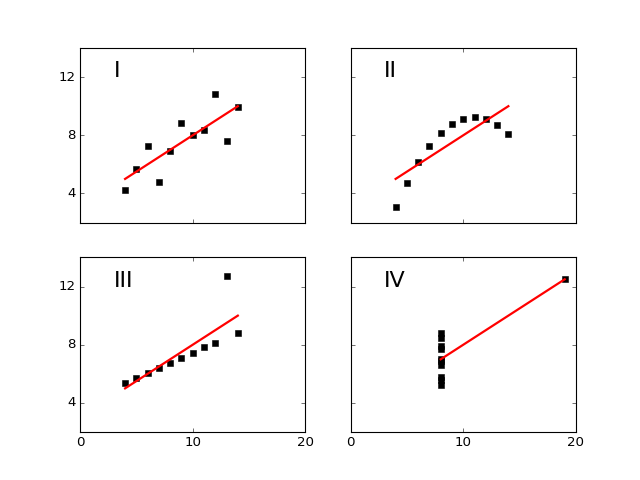

In [50]:
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

def fit(x):
    return 3 + 0.5*x

xfit = np.array([np.amin(x), np.amax(x)])

plt.figure()
plt.subplot(221)
plt.plot(x, y1, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'I', fontsize=20)

plt.subplot(222)
plt.plot(x, y2, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), xticklabels=[], yticks=(4, 8, 12), yticklabels=[], xticks=(0, 10, 20))
plt.text(3, 12, 'II', fontsize=20)

plt.subplot(223)
plt.plot(x, y3, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.text(3, 12, 'III', fontsize=20)
plt.setp(plt.gca(), yticks=(4, 8, 12), xticks=(0, 10, 20))

plt.subplot(224)
xfit = np.array([np.amin(x4), np.amax(x4)])
plt.plot(x4, y4, 'ks', xfit, fit(xfit), 'r-', lw=2)
plt.axis([2, 20, 2, 14])
plt.setp(plt.gca(), yticklabels=[], yticks=(4, 8, 12), xticks=(0, 10, 20))
plt.text(3, 12, 'IV', fontsize=20)



<img src='images/hetero.png' width="500">

[source:Wikipedia](https://en.wikipedia.org/wiki/Heteroscedasticity)

__ Minimizing the Sum of Squared Errors, SSE __
### $$SSE  = \sum_{i=1} ^N (y_i - \hat{y_i})^2  $$ ###

Where:
- $y_i$ value of data point
- $\hat{y_i}$ = predicted y-value

__ Regression slope __

$$ \hat{a} = \frac{ \sum_{i=1} ^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1} ^N (x_i - \bar{x})^2} $$

__ Regression Intercept __
$$ \hat{b} = \bar{y} - \hat{a}\bar{x} $$

__ Standard Error __
$$ s_e = ( \frac{SSE}{N-2} )^{1/2} $$

__Confidence Intervals __

$$ \hat{a} - t_{\nu,\alpha /2} \frac{s_e^2}{\sum_{i=1}^N (x-\bar{x})^2} < a < \hat{a} + t_{\nu,\alpha /2} \frac{s_e^2}{\sum_{i=1}^N (x-\bar{x})^2} $$

__ Type II regression __

Case where there are potentially errors in both the x and y variables

<img src='images/type_2_reg.png' width="700">
Reference for Geometric Mean Function Regression (GMFR, a.k.a. neutral regression)

Ricker, W. E. Computation and uses of central trend lines
Can. J. Zool., 1984, 62, 1897-1905 

__ Calculating Geometric Mean __

- $\hat{a}_{yx}$ : slope f regression of y on x
- $\hat{a}_{xy}$ : slope f regression of y on x
- Geometric mean: $ \hat{a}_{GM} =   \sqrt{\frac {\hat{a}_{yx}} {\hat{a}_{xy}} }$


__General Linear Regression - higher order polynomials__

```python
numpy.polyfit
```
<img src='images/poly_reg.png' width="600">

[Source](http://www.turingfinance.com/regression-analysis-using-python-statsmodels-and-quandl/)

__ Non Linear Least-Squared __<br>
__Iterative procedure__: parameters of the function are adjusted until the fit to data does not get any better <br>
See: http://www.turingfinance.com/regression-analysis-using-python-statsmodels-and-quandl/

__Fitting an Exponential curve__ (See Glover Jenkins, and Doney Fig 3.9):

$ P = P_o e^{\mu t} $

or

$ P =P(0) + P_o e^{\mu t} $


```python
from scipy.optimize import curve_fit
help(curve_fit)
```
